## Cave generation using cellular automata
Inspired by blog post [The Cellular Automaton Method for Cave Generation](https://jeremykun.com/2012/07/29/the-cellular-automaton-method-for-cave-generation/) by Jeremy Kun.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.ioff()

from cellular_automaton import CellularAutomaton

In [2]:
import matplotlib.animation as manimation
manimation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']

In [17]:
"""
Conway's Game of Life on a randomly initialized board
"""
grid = np.random.choice([0, 1], p=[0.9, 0.1], size=(100, 150))
# create a "Game of Life" (B3/S23) automaton
# initialized with the random grid
automaton = CellularAutomaton(grid, 
                              rules={'B': [3],
                                     'S': [2, 3]})
# init graphics
fig = plt.figure(figsize=(12, 8))
game_board = plt.imshow(grid, cmap=plt.cm.Greys, animated=True)
plt.xticks([])
plt.yticks([])

def update(frame):
    automaton.update()
    game_board.set_data(automaton.grid)
    return game_board,

animation = FuncAnimation(fig, update, frames=range(30), blit=True)

matplotlib.rcParams['figure.figsize'] = (12, 18)
display(HTML(animation.to_html5_video()))
plt.close()

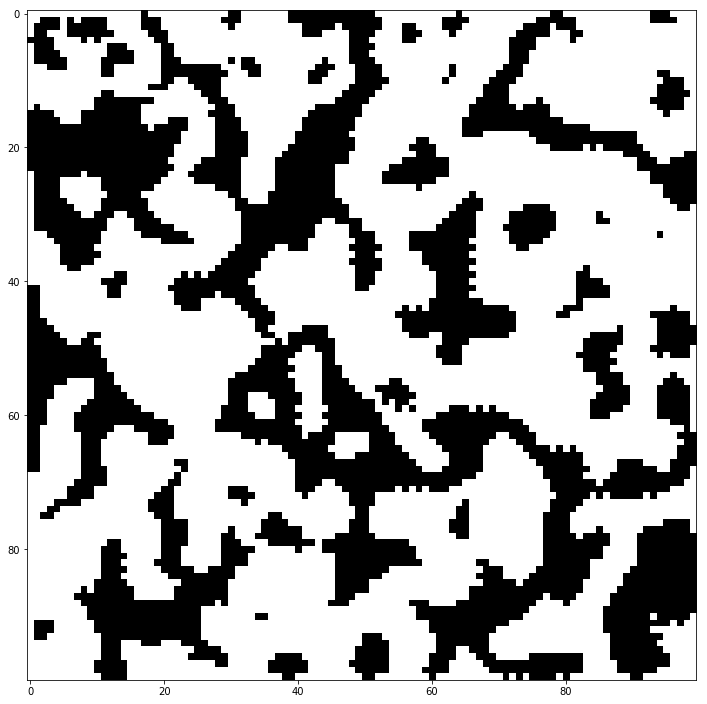

In [5]:
grid = np.random.choice([0, 1], size=(100, 100))
# fill border
grid[:,  0] = 1
grid[:, -1] = 1
grid[ 0, :] = 1
grid[-1, :] = 1

# create B678/S345678 automaton
# initialized with the random grid
automaton = CellularAutomaton(grid, 
                rules={'B': [6, 7, 8],
                       'S': [3, 4, 5, 6, 7, 8]})

# run automaton for 20 steps,
# it should converge fast
for _ in range(15):
    automaton.update() # update grid
    
smoothing_automaton = CellularAutomaton(automaton.grid, 
                                rules={'B': [5, 6, 7, 8],
                                       'S': [5, 6, 7, 8]}) 

# run smoothing
for _ in range(3):
    smoothing_automaton.update() # update grid

cave = smoothing_automaton.grid
    
    
matplotlib.rcParams['figure.figsize'] = (12, 18)
fig, ax = plt.subplots()
ax.imshow(cave, cmap=plt.cm.Greys, animated=True)